Метод Рунге-Кутты


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
def f_for_Runge_Kutta(t, xy, params):
    x,y = xy
    dx = x - y + np.exp(t)
    dy = x + 3*y
    return np.array([dx, dy])

In [ ]:
def count_k(x, y, h, func, params):
  k1 = func(x, y, params);
  k2 = func(x + h/2, y + h/2*k1, params);
  k3 = func(x + h/2, y + h/2*k2, params);
  k4 = func(x + h, y + h*k3, params);
  return y + h *(k1 + 2 * k2 + 2 * k3 + k4) / 6

In [ ]:
def Runge_Kutta(x0, xn, y0, h, func, params):
  y= [y0]
  while True:
    if h > 0:
      h = min(h, xn - x0)
    else:
      h = max(h, xn - x0)
    x0 = x0 + h
    if x0 == xn:
      break
    y0 = count_k(x0, y0, h, func, params)
    y.append(y0)
  return  np.array(y)

Метод стрельбы

In [ ]:
def shooting_method(approx, func, left, right, step, boundary_condition, params, eps:1e-4):
  newton_steps = 0
  ys = []
  F = np.zeros((len(approx), len(approx)))
  while(True): 
        y = np.concatenate((Runge_Kutta((right - left) / 2, left, approx, -step, func, params)[::-1],
                             Runge_Kutta((right - left) / 2, right, approx, step, func, params)[1:]))
        residuals = np.array([y[:,0][0] - boundary_condition[0], y[:,1][-1] - boundary_condition[1]])
        print(residuals)
        print(newton_steps)
        if (np.abs(residuals) < eps).all():
            break
        newton_steps += 1 
        F = np.zeros((len(approx), len(approx)))
        
        for i in range(len(approx)):
            y_approx = approx.copy()
            y_approx[i] += eps
            y_i = np.concatenate((Runge_Kutta((right - left) / 2, left, y_approx, -step, func, params)[::-1],
                                  Runge_Kutta((right - left) / 2, right, y_approx, step, func, params)[1:]))
            residuals_i = np.array([y_i[:,0][0] - boundary_condition[0], y_i[:,1][-1] - boundary_condition[1]])
            F[:, i] = (residuals_i - residuals) / eps
        if np.linalg.det(F) < eps:
            print('определитель матрицы Фреше равен нулю')
            print(F)
            params[0] += eps
            y_p = np.concatenate((Runge_Kutta((right - left) / 2, left, y_approx, -step, func, params)[::-1],
                          Runge_Kutta((right - left) / 2, right, y_approx, step, func, params)[1:]))
            params[0] -= eps
            residuals_p = np.array([y_p[:,0][0] - boundary_condition[0], y_p[:,1][-1] - boundary_condition[1]])
            column = (residuals_p - residuals) / eps
            aug_F = np.zeros((len(approx), len(approx) + 1))
            aug_F[:, 0:-1] = F
            aug_F[:, -1] = column
            return newton_steps, ys, approx, aug_F
        approx = approx - np.dot(np.linalg.inv(F), residuals)
    
        ys = np.concatenate((Runge_Kutta((right - left) / 2, left, approx, -step, func, params)[::-1],
                      Runge_Kutta((right - left) / 2, right, approx, step, func, params)[1:]))
    
  return newton_steps, ys, approx, F

In [ ]:
h = 0.01
steps, y, approx, F = shooting_method([0,0], f_for_Runge_Kutta, 0, 1 + h, h, [0, np.e], [], 1e-4)

[-0.48126102 -2.23362901]
0
[-8.22439339e-13  8.52207194e-13]
1


In [ ]:
print('Number of steps:', steps)

Number of steps: 1


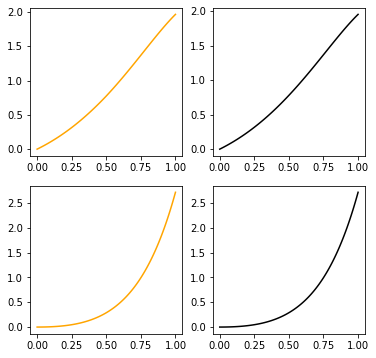

In [ ]:
x = np.arange(0,1 + h,h)
x2 = [(2-t)*np.exp(2*t)-2*np.exp(t) for t in x]
y2 = [(t-1)*np.exp(2*t)+np.exp(t) for t in x]
fig, ax = plt.subplots(2,2,figsize=(6, 6))
ax[0][0].plot(x, y[:,0], c='orange')
ax[0][1].plot(x, x2, c='black')
ax[1][0].plot(x, y[:,1], c='orange')
ax[1][1].plot(x, y2, c='black')

In [ ]:
np.mean(np.abs(x2 - y[:,0]))

0.0034599181943637735

In [ ]:
def func_with_lambda(t, y, params):
    #y[0] = u
    #y[1] = y = u'
    #f[0] = y = u'
    #f[1] = y' = u''
    dx = y[1]
    dy = -params[0]*np.exp(y[0])
    return np.array([dx, dy])
    +
    

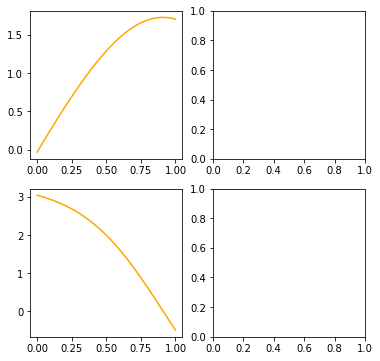

In [ ]:
x = np.arange(0,1 + h,h)
fig, ax = plt.subplots(2,2,figsize=(6, 6))
ax[0][0].plot(x, y[:,0], c='orange')
ax[1][0].plot(x, y[:,1], c='orange')

[-5.69381709 21.07377151]
0
[-3.80726155  7.53718249]
1
[-2.23443764  2.0619491 ]
2
определитель матрицы Фреше равен нулю
[[ 0.87765676 -0.07501462]
 [ 0.34148687 -0.29895432]]


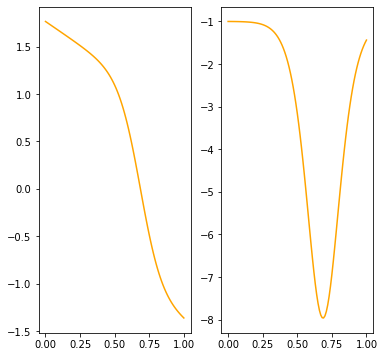

In [ ]:
def func_with_lambda(t, y, params):
    #y[0] = u
    #y[1] = y = u'
    #f[0] = y = u'
    #f[1] = y' = u''
    dx = y[1]
    dy = 1/params[0]*y[0]*(y[1] + 1)
    return np.array([dx, dy])

h = 0.01
steps, y, approx, F = shooting_method([0, 1], func_with_lambda, 0, 1 + h, h, [4, -3.5], [0.1], 1e-4)
x = np.arange(0,1 + h,h)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6, 6))
ax1.plot(x, y[:,0], c='orange')
ax2.plot(x, y[:,1], c='orange')

In [ ]:
def augmented_frechet_matrix(approx, func, left, right, step, boundary_condition, params, cur_p, eps:1e-4):
    y = np.concatenate((Runge_Kutta((right - left) / 2, left, approx, -step, func, params)[::-1],
                        Runge_Kutta((right - left) / 2, right, approx, step, func, params)[1:]))
    residuals = np.array([y[:,0][0] - boundary_condition[0], y[:,1][-1] - boundary_condition[1]])
    F = np.zeros((len(approx), len(approx) + 1))
    for i in range(len(approx)):
      y_approx = approx.copy()       
      y_approx[i] += eps
      y_i = np.concatenate((Runge_Kutta((right - left) / 2, left, y_approx, -step, func, params)[::-1],
                          Runge_Kutta((right - left) / 2, right, y_approx, step, func, params)[1:]))
      residuals_i = np.array([y_i[:,0][0] - boundary_condition[0], y_i[:,1][-1] - boundary_condition[1]])
      F[:, i] = (residuals_i - residuals) / eps
    params[cur_p] += eps
    y_p = np.concatenate((Runge_Kutta((right - left) / 2, left, y_approx, -step, func, params)[::-1],
                          Runge_Kutta((right - left) / 2, right, y_approx, step, func, params)[1:]))
    params[cur_p] -= eps
    residuals_p = np.array([y_p[:,0][0] - boundary_condition[0], y_p[:,1][-1] - boundary_condition[1]])
    F[:, -1] = (residuals_p - residuals) / eps
    return F

In [ ]:
def analyse_point(aug_F, eps:1e-4):
    dets = []
    for col in range(len(aug_F[0])):
        cols = [i for i in range(len(aug_F[0])) if i != col]
        dets.append(np.linalg.det(aug_F[:, cols]))
    if (np.abs(dets) < eps).all():
        return True, np.round(dets, 4)
    return False, np.round(dets, 4)

In [ ]:
def finding_solutions(aug_F, rank, residuals, params, approx, rad):
  len_J = len(aug_F[0]) - 1
  J = aug_F[:, 0:len_J]
  C = aug_F[:, -1]
  J_11 = J[0:rank, 0:rank]
  J_21 = J[rank:len_J, 0:rank]
  J_mult = np.dot(J_21, np.linalg.inv(J_11)) 
  C_1 = C[0:rank]
  C_2 = C[rank:len_J]
  N_1 = residuals[0:rank]
  N_2 = residuals[rank:len_J]

In [ ]:
F = augmented_frechet_matrix(approx, func_with_lambda, 0, 1 + h, h, [0, 0], [0.87846], 0, 1e-4)
print(F)

[[ 0.72992111 -0.46274992 -0.77017641]
 [-1.85682027  0.45045107 -1.66320274]]


In [ ]:
print(analyse_point(F, 1e-4))

(False, array([  1.7168, -15.508 ,  -0.2368]))
